In [6]:
import pandas as pd
import seaborn as sns

salaire_df = pd.read_csv("Salaire_donnee.csv")
salaire_df.head()


,Experience,Salaire
0,0.000000,3.275294
1,0.060606,2.003359
2,0.121212,4.182534
3,0.181818,7.547732
4,0.242424,7.925572


<Axes: xlabel='Experience', ylabel='Salaire'>

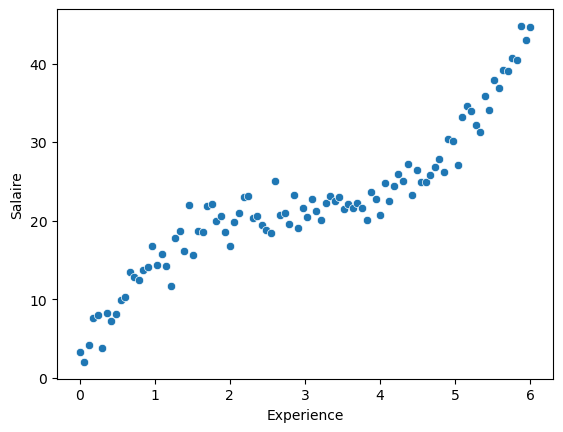

In [7]:
sns.scatterplot(data=salaire_df, x=salaire_df['Experience'], y=salaire_df['Salaire'])

### la nature de cette graph est non linear

In [30]:
X = salaire_df['Experience'].values.reshape(-1,1)
Y = salaire_df['Salaire']

In [31]:
X.shape

(100, 1)

In [32]:
Y

0      3.275294
1      2.003359
2      4.182534
3      7.547732
4      7.925572
        ...    
95    40.707864
96    40.504775
97    44.793761
98    42.945366
99    44.623581
Name: Salaire, Length: 100, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(Y_train.dtype)

float64


In [41]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(X_train,Y_train)

y_pred = model.predict(X_test)


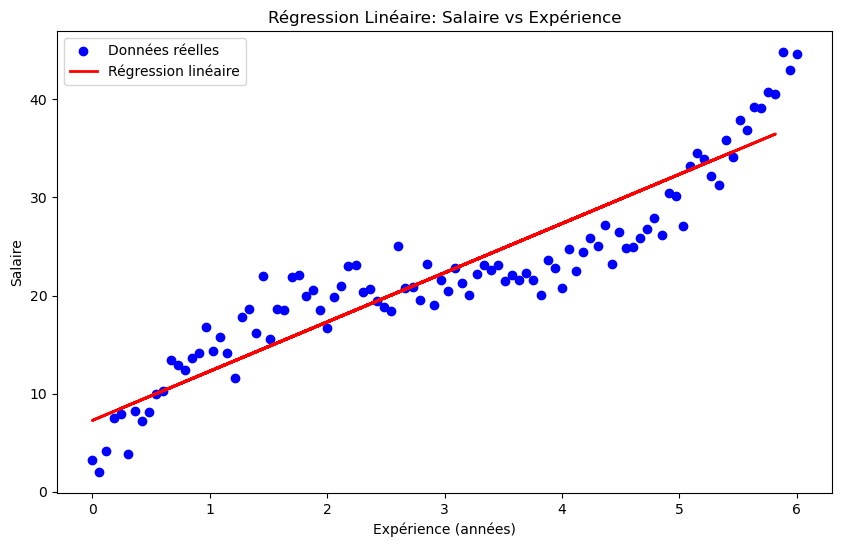

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Données réelles')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Régression linéaire')
plt.title('Régression Linéaire: Salaire vs Expérience')
plt.xlabel('Expérience (années)')
plt.ylabel('Salaire')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred)
print(f"Coefficient de détermination (R^2): {r2}")

Coefficient de détermination (R^2): 0.8208804080721221


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

poly_features = PolynomialFeatures(degree=4)
X_train_poly = poly_features.fit_transform(X_train)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, Y_train)
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot = poly_reg_model.predict(X_plot_poly)





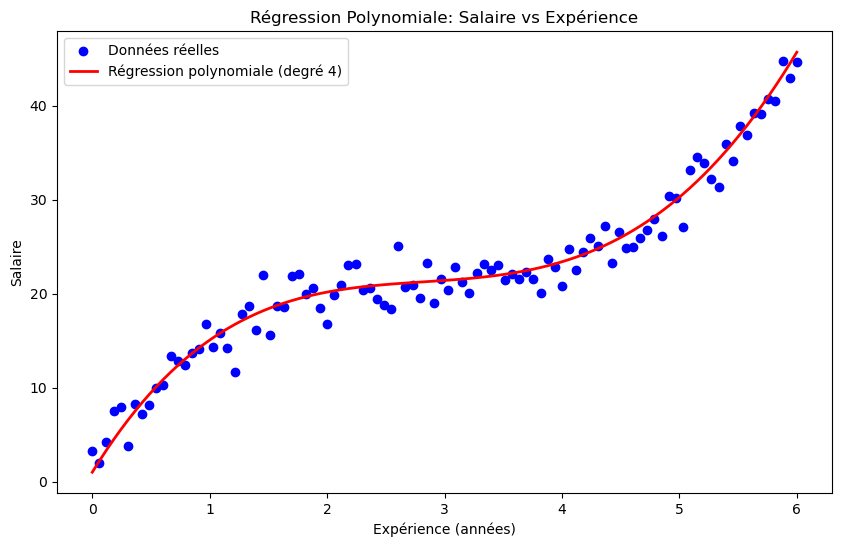

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Données réelles')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Régression polynomiale (degré 4)')
plt.title('Régression Polynomiale: Salaire vs Expérience')
plt.xlabel('Expérience (années)')
plt.ylabel('Salaire')
plt.legend()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [30, 100]